In [57]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
pd.options.display.float_format = '{:.2f}'.format


In [58]:
stocks = pd.read_csv('../data/stock_values_2028.csv', parse_dates =["Date"], index_col="Date")
stocks.head()

,AT0000606306,AT0000652011,AT0000720008,AT0000730007,AT0000743059,AT0000746409,AT0000831706,AT0000908504,AT0000937503,AT0000A21KS2,...,SE0000695876,SE0000825820,SE0001662230,SE0005190238,SE0007100581,SE0007100599,SE0011090018,SE0011166610,SE0012455673,SE0013256682
Date,,,,,,,,,,,,,,,,,,,,,
2007-12-31,112.17,59.38,19.26,20.62,40.79,37.10,42.55,56.04,44.40,88.90,...,81.50,52.19,68.09,54.77,50.67,70.83,151.25,71.26,143.69,83.77
2008-01-31,80.97,36.01,17.28,16.50,47.67,44.10,27.70,51.49,40.98,48.30,...,84.62,44.38,54.43,68.72,36.67,59.17,105.50,63.46,55.20,86.35
2008-02-29,81.78,38.30,13.78,18.68,47.57,49.05,29.01,55.38,41.80,54.79,...,83.88,57.69,57.17,58.09,37.25,57.83,106.75,68.40,68.45,82.22
2008-03-31,82.69,40.84,12.05,17.39,41.57,45.09,30.44,48.52,44.00,52.35,...,90.25,57.33,60.34,59.68,35.92,57.67,102.75,71.57,60.98,77.58
2008-04-30,99.69,47.45,14.59,19.11,48.11,49.74,33.45,48.08,49.25,54.10,...,98.50,59.46,52.11,70.98,31.17,55.50,96.00,68.05,62.91,88.41


In [59]:
returns = stocks.pct_change().dropna()
returns.head()

,AT0000606306,AT0000652011,AT0000720008,AT0000730007,AT0000743059,AT0000746409,AT0000831706,AT0000908504,AT0000937503,AT0000A21KS2,...,SE0000695876,SE0000825820,SE0001662230,SE0005190238,SE0007100581,SE0007100599,SE0011090018,SE0011166610,SE0012455673,SE0013256682
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-31,-0.28,-0.39,-0.10,-0.20,0.17,0.19,-0.35,-0.08,-0.08,-0.46,...,0.04,-0.15,-0.20,0.25,-0.28,-0.16,-0.30,-0.11,-0.62,0.03
2008-02-29,0.01,0.06,-0.20,0.13,-0.00,0.11,0.05,0.08,0.02,0.13,...,-0.01,0.30,0.05,-0.15,0.02,-0.02,0.01,0.08,0.24,-0.05
2008-03-31,0.01,0.07,-0.13,-0.07,-0.13,-0.08,0.05,-0.12,0.05,-0.04,...,0.08,-0.01,0.06,0.03,-0.04,-0.00,-0.04,0.05,-0.11,-0.06
2008-04-30,0.21,0.16,0.21,0.10,0.16,0.10,0.10,-0.01,0.12,0.03,...,0.09,0.04,-0.14,0.19,-0.13,-0.04,-0.07,-0.05,0.03,0.14
2008-05-30,-0.07,0.03,-0.03,0.14,0.09,0.09,-0.08,0.02,0.09,0.07,...,0.07,0.11,0.00,-0.04,0.11,0.00,0.07,0.10,0.04,0.02


In [60]:
returns.mean(axis = 1)

Date
2008-01-31   -0.09
2008-02-29    0.01
2008-03-31   -0.01
2008-04-30    0.04
2008-05-30    0.01
2008-06-30   -0.12
2008-07-31   -0.03
2008-08-29    0.04
2008-09-30   -0.14
2008-10-31   -0.19
2008-11-28   -0.06
2008-12-30    0.01
dtype: float64

In [61]:
no_assets = len(stocks.columns)
no_assets

486

In [62]:
weights = [1/no_assets for i in range (no_assets)]
weights[:3]

[0.00205761316872428, 0.00205761316872428, 0.00205761316872428]

In [63]:
#daily returns equally weighted portfolio
returns.mul(weights, axis = "columns").sum(axis = 1)

Date
2008-01-31   -0.09
2008-02-29    0.01
2008-03-31   -0.01
2008-04-30    0.04
2008-05-30    0.01
2008-06-30   -0.12
2008-07-31   -0.03
2008-08-29    0.04
2008-09-30   -0.14
2008-10-31   -0.19
2008-11-28   -0.06
2008-12-30    0.01
dtype: float64

In [64]:
#same thing all in one step ; matrix multiplication
returns.dot(weights)

Date
2008-01-31   -0.09
2008-02-29    0.01
2008-03-31   -0.01
2008-04-30    0.04
2008-05-30    0.01
2008-06-30   -0.12
2008-07-31   -0.03
2008-08-29    0.04
2008-09-30   -0.14
2008-10-31   -0.19
2008-11-28   -0.06
2008-12-30    0.01
dtype: float64

In [65]:
#create a new column for the returns of the eq. weighted porfolio
returns["EWP"] = returns.dot(weights)
returns.head()

,AT0000606306,AT0000652011,AT0000720008,AT0000730007,AT0000743059,AT0000746409,AT0000831706,AT0000908504,AT0000937503,AT0000A21KS2,...,SE0000825820,SE0001662230,SE0005190238,SE0007100581,SE0007100599,SE0011090018,SE0011166610,SE0012455673,SE0013256682,EWP
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-31,-0.28,-0.39,-0.10,-0.20,0.17,0.19,-0.35,-0.08,-0.08,-0.46,...,-0.15,-0.20,0.25,-0.28,-0.16,-0.30,-0.11,-0.62,0.03,-0.09
2008-02-29,0.01,0.06,-0.20,0.13,-0.00,0.11,0.05,0.08,0.02,0.13,...,0.30,0.05,-0.15,0.02,-0.02,0.01,0.08,0.24,-0.05,0.01
2008-03-31,0.01,0.07,-0.13,-0.07,-0.13,-0.08,0.05,-0.12,0.05,-0.04,...,-0.01,0.06,0.03,-0.04,-0.00,-0.04,0.05,-0.11,-0.06,-0.01
2008-04-30,0.21,0.16,0.21,0.10,0.16,0.10,0.10,-0.01,0.12,0.03,...,0.04,-0.14,0.19,-0.13,-0.04,-0.07,-0.05,0.03,0.14,0.04
2008-05-30,-0.07,0.03,-0.03,0.14,0.09,0.09,-0.08,0.02,0.09,0.07,...,0.11,0.00,-0.04,0.11,0.00,0.07,0.10,0.04,0.02,0.01


In [66]:
summary = returns.agg(["mean", "std"]).T
summary

,mean,std
AT0000606306,-0.12,0.19
AT0000652011,-0.08,0.18
AT0000720008,-0.05,0.13
AT0000730007,-0.05,0.15
AT0000743059,-0.05,0.15
...,...,...
SE0011090018,-0.03,0.12
SE0011166610,-0.03,0.12
SE0012455673,-0.13,0.24
SE0013256682,-0.05,0.13


In [67]:
#annualized 
summary["mean"] = summary["mean"] * 12
summary["std"] = summary["std"] * np.sqrt(12)
summary

,mean,std
AT0000606306,-1.43,0.64
AT0000652011,-1.02,0.62
AT0000720008,-0.59,0.46
AT0000730007,-0.65,0.53
AT0000743059,-0.63,0.51
...,...,...
SE0011090018,-0.35,0.40
SE0011166610,-0.33,0.40
SE0012455673,-1.51,0.84
SE0013256682,-0.54,0.45


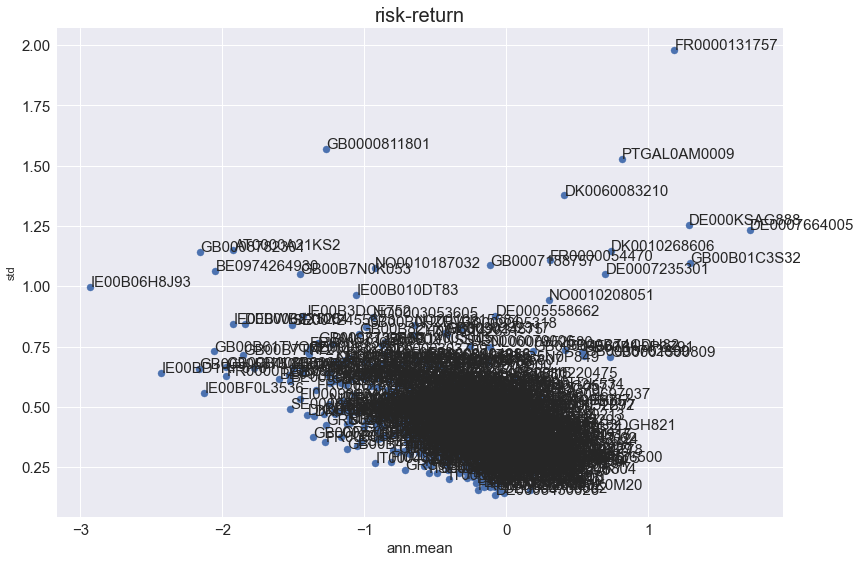

In [68]:
summary.plot(kind = "scatter", x= "mean", y="std", figsize = (13,9), s= 50, fontsize  = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i,"mean"]+0.002, summary.loc[i,"std"]+0.002), size =15)

plt.xlabel("ann.std", fontsize = 15)
plt.xlabel("ann.mean", fontsize = 15)
plt.title("risk-return", fontsize = 20)
plt.show()

In [69]:
# def ann_risk_return(returns_df):
#     summary = returns.agg(["mean", "std"]).T
#     summary.mean = summary.mean*12
#     summary.std = summary.std*np.sqrt(12)
#     return summary
# ann_risk_return(returns)


In [70]:
cov_matrix = returns.cov()
# months = 
cov_matrix

,AT0000606306,AT0000652011,AT0000720008,AT0000730007,AT0000743059,AT0000746409,AT0000831706,AT0000908504,AT0000937503,AT0000A21KS2,...,SE0000825820,SE0001662230,SE0005190238,SE0007100581,SE0007100599,SE0011090018,SE0011166610,SE0012455673,SE0013256682,EWP
AT0000606306,0.03,0.03,0.02,0.02,0.01,0.01,0.02,0.02,0.02,0.04,...,0.02,-0.00,0.01,0.00,0.01,0.00,0.01,0.03,0.01,0.01
AT0000652011,0.03,0.03,0.01,0.02,0.00,0.00,0.02,0.02,0.01,0.04,...,0.02,0.00,0.00,0.01,0.01,0.01,0.01,0.03,0.01,0.01
AT0000720008,0.02,0.01,0.02,0.01,0.01,0.00,0.01,0.01,0.00,0.01,...,0.00,-0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.01
AT0000730007,0.02,0.02,0.01,0.02,0.01,0.01,0.01,0.01,0.01,0.04,...,0.02,0.00,0.00,0.01,0.00,0.01,0.01,0.03,0.01,0.01
AT0000743059,0.01,0.00,0.01,0.01,0.02,0.01,-0.00,0.01,0.02,0.02,...,0.01,-0.00,0.01,-0.00,-0.00,-0.01,0.00,0.00,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SE0011090018,0.00,0.01,0.00,0.01,-0.01,-0.01,0.01,0.00,-0.00,0.01,...,0.00,0.01,-0.01,0.01,0.01,0.01,0.00,0.02,-0.00,0.00
SE0011166610,0.01,0.01,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.03,...,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.01
SE0012455673,0.03,0.03,0.01,0.03,0.00,0.00,0.03,0.02,0.01,0.05,...,0.03,0.01,-0.01,0.02,0.01,0.02,0.01,0.06,0.01,0.01
SE0013256682,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.03,...,0.01,-0.00,0.01,0.00,-0.00,-0.00,0.01,0.01,0.02,0.01


In [71]:
rf = 0.025
print (summary["mean"])

summary[summary.index == 'EWP']

AT0000606306   -1.43
AT0000652011   -1.02
AT0000720008   -0.59
AT0000730007   -0.65
AT0000743059   -0.63
                ... 
SE0011090018   -0.35
SE0011166610   -0.33
SE0012455673   -1.51
SE0013256682   -0.54
EWP            -0.54
Name: mean, Length: 487, dtype: float64


,mean,std
EWP,-0.54,0.26


In [72]:
def calc_eq_sharpe(weights, mean_returns, cov, rf):
#         portfolio_return = np.sum(mean_returns * weights) * weeks   
        portfolio_return = summary[summary.index == 'EWP']["mean"]
#         portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(weeks)
        portfolio_std = summary[summary.index == 'EWP']["std"]
#         sharpe_ratio = (portfolio_return - rf) / portfolio_std
        sharpe_ratio = (portfolio_return - rf) / portfolio_std
        return portfolio_return, portfolio_std, sharpe_ratio, weights
    
portfolio_return, portfolio_std, sharpe_ratio, weights = calc_eq_sharpe(weights, summary.mean, cov_matrix, rf)

print(portfolio_return)
print(portfolio_std)
print(sharpe_ratio)

EWP   -0.54
Name: mean, dtype: float64
EWP   0.26
Name: std, dtype: float64
EWP   -2.15
dtype: float64
